In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('genetic_train.csv')
data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [4]:
data['Disorder Subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', nan, "Alzheimer's"],
      dtype=object)

# Basic EDA

In [5]:
data.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


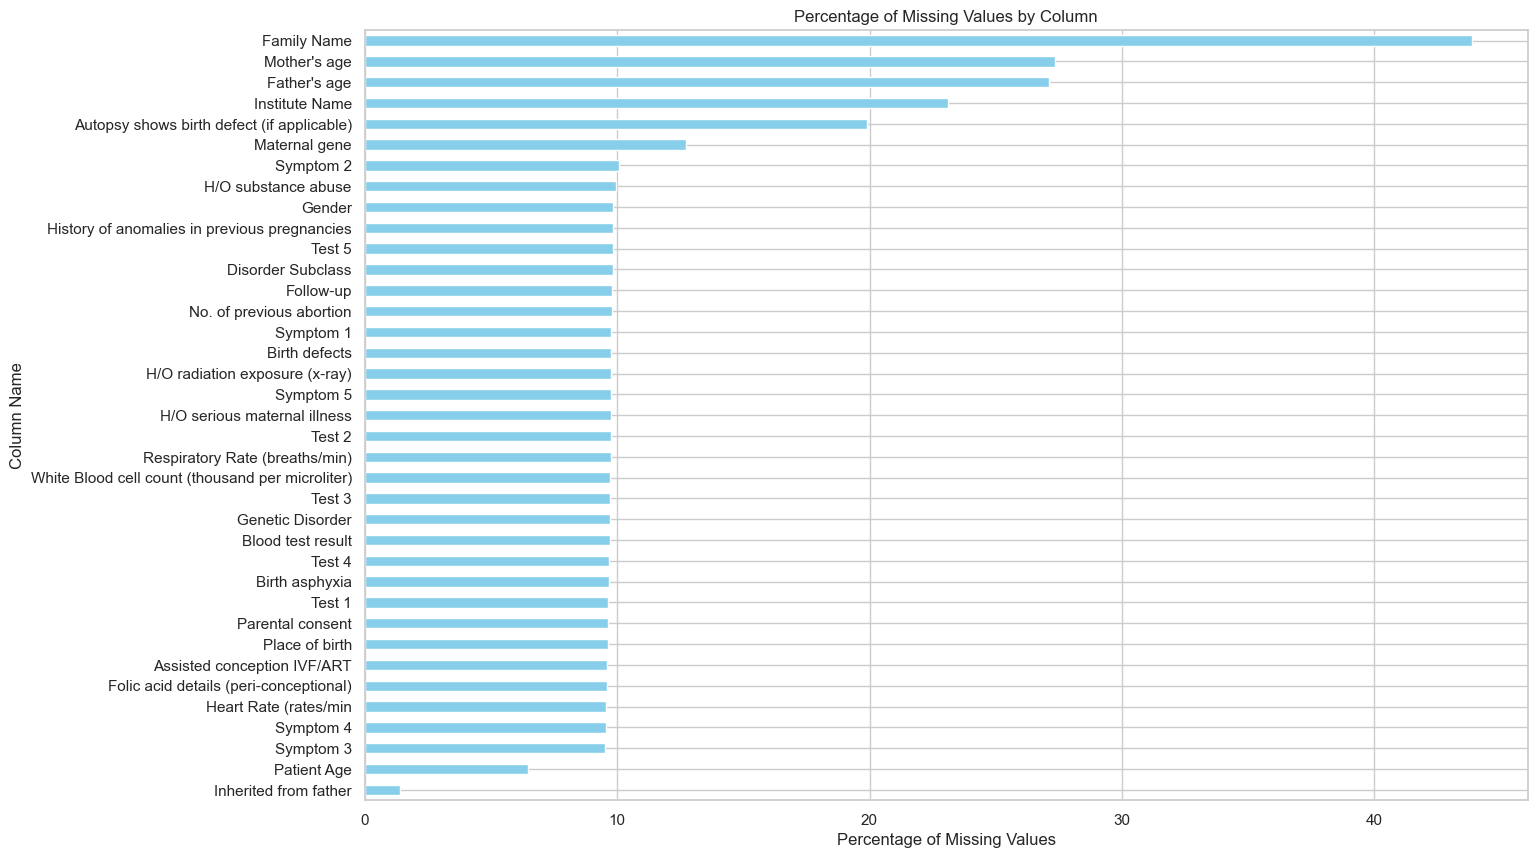

In [6]:
# Calculate missing values percentages
missing_percentage = data.isnull().sum() / len(data) * 100

# Filter columns with missing values and sort them
missing_percentage_filtered = missing_percentage[missing_percentage > 0].sort_values()

# Plotting
plt.figure(figsize=(15, 10))
missing_percentage_filtered.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.show()


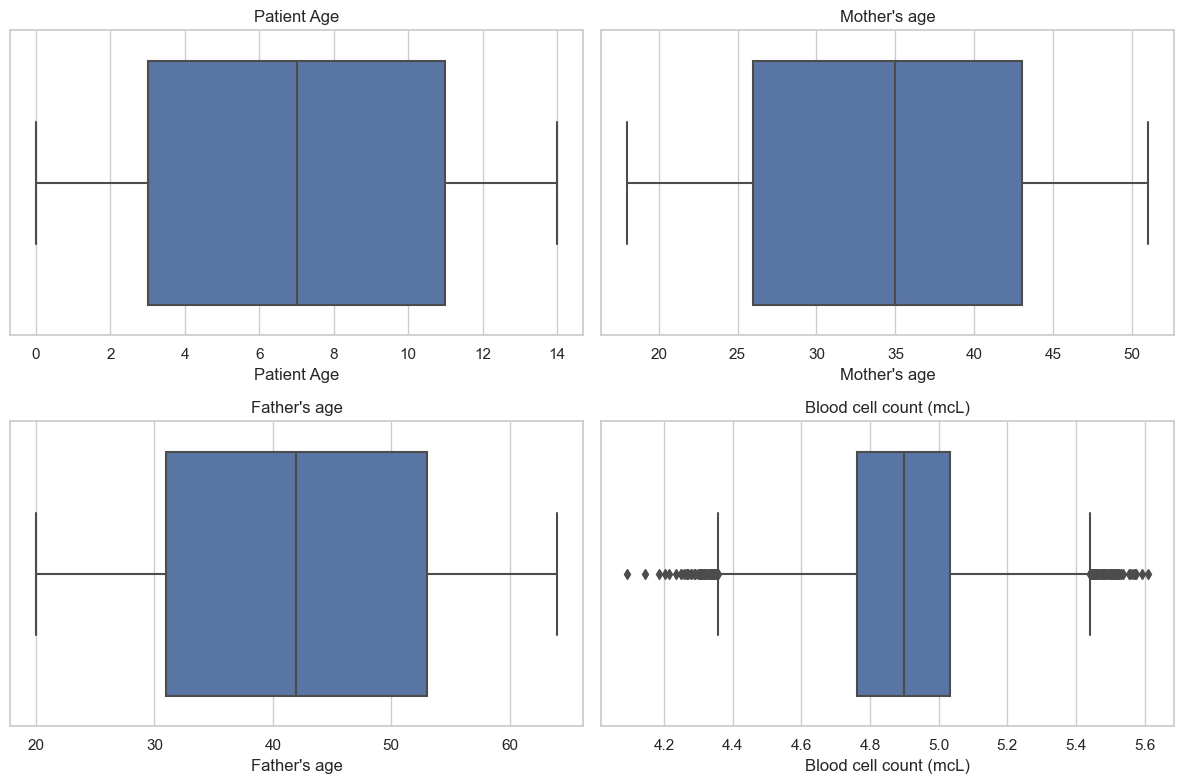

In [7]:
numerical_columns = ['Patient Age', 'Mother\'s age', 'Father\'s age', 'Blood cell count (mcL)']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## **Not much significant Outliers**

C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


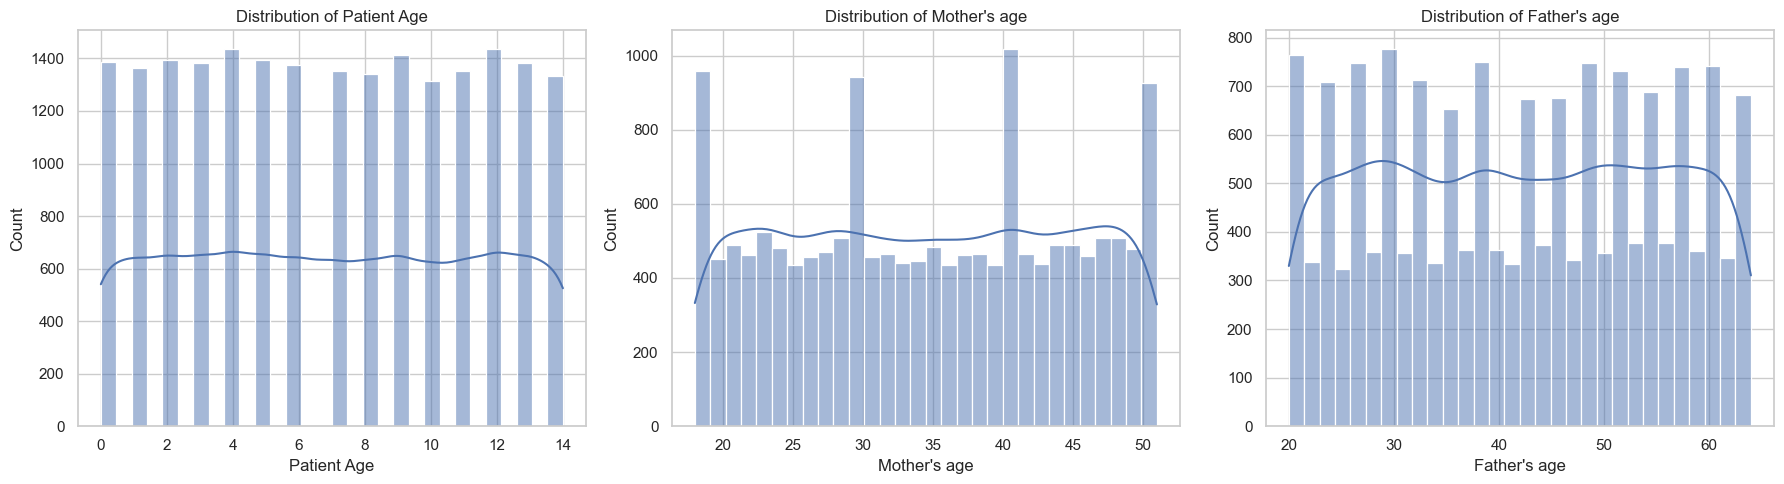

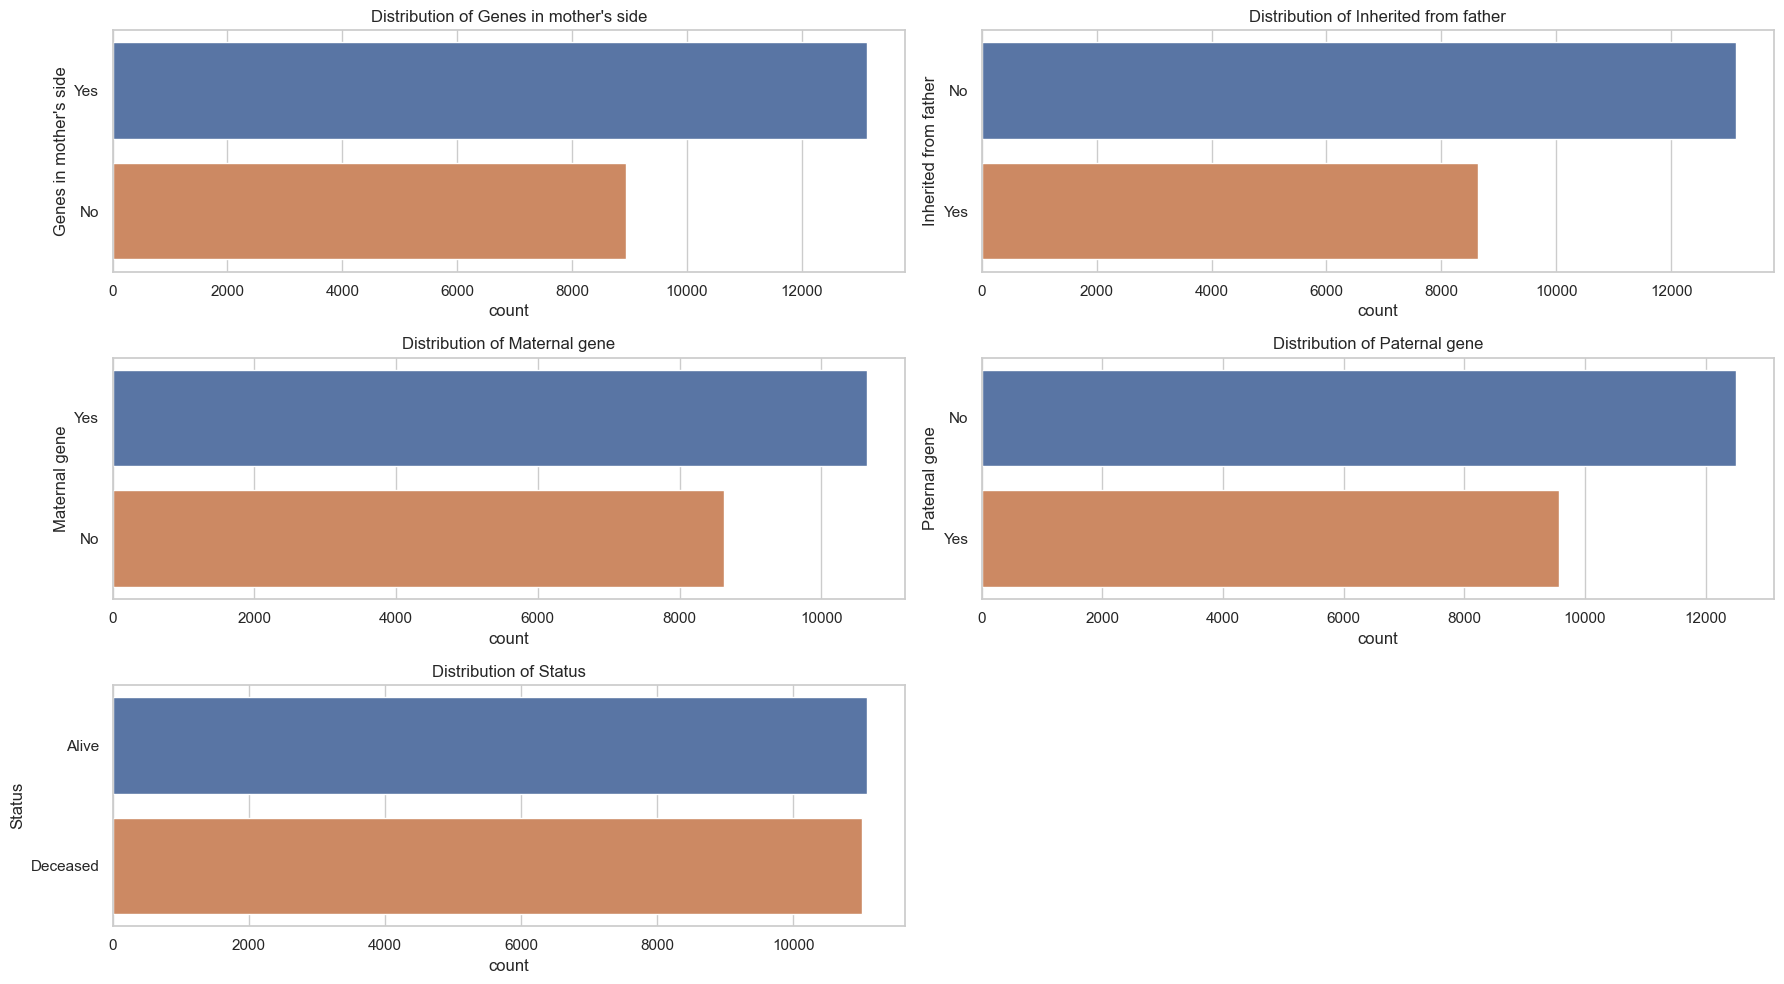

In [8]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Patient Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Patient Age')

plt.subplot(1, 3, 2)
sns.histplot(data["Mother's age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Mother's age")

plt.subplot(1, 3, 3)
sns.histplot(data["Father's age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Father's age")

plt.tight_layout()
plt.show()

categorical_variables = ['Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Status']

plt.figure(figsize=(18, 10))

for i, column in enumerate(categorical_variables, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


# Data Preprocessing

In [9]:
data.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [10]:
data["Birth asphyxia"] = data["Birth asphyxia"].replace("No record",np.NaN)
data["Birth asphyxia"] = data["Birth asphyxia"].replace("Not available",np.NaN)

data["Autopsy shows birth defect (if applicable)"] = data["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
data["Autopsy shows birth defect (if applicable)"] = data["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)
data["H/O radiation exposure (x-ray)"] = data["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
data["H/O radiation exposure (x-ray)"] = data["H/O radiation exposure (x-ray)"].replace("-",np.NaN)

data["H/O substance abuse"] = data["H/O substance abuse"].replace("Not applicable",np.NaN)
data["H/O substance abuse"] = data["H/O substance abuse"].replace("-",np.NaN)

In [11]:
data.isna().sum()

Patient Age                                          1427
Genes in mother's side                                  0
Inherited from father                                 306
Maternal gene                                        2810
Paternal gene                                           0
Blood cell count (mcL)                                  0
Mother's age                                         6036
Father's age                                         5986
Status                                                  0
Respiratory Rate (breaths/min)                       2149
Heart Rate (rates/min                                2113
Parental consent                                     2125
Follow-up                                            2166
Gender                                               2173
Birth asphyxia                                      12133
Autopsy shows birth defect (if applicable)          15475
Place of birth                                       2124
Folic acid det

In [12]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum().sum(), data.head()

(0,
    Patient Age Genes in mother's side Inherited from father Maternal gene  \
 0          2.0                    Yes                    No           Yes   
 1          4.0                    Yes                   Yes            No   
 2          6.0                    Yes                    No            No   
 3         12.0                    Yes                    No           Yes   
 4         11.0                    Yes                    No           Yes   
 
   Paternal gene  Blood cell count (mcL)  Mother's age  Father's age    Status  \
 0            No                4.760603          35.0          42.0     Alive   
 1            No                4.910669          35.0          23.0  Deceased   
 2            No                4.893297          41.0          22.0     Alive   
 3            No                4.705280          21.0          42.0  Deceased   
 4           Yes                4.720703          32.0          42.0     Alive   
 
   Respiratory Rate (breaths/min

In [13]:
data.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness

In [14]:
data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [15]:
data.rename(columns={"Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene"},inplace=True)

In [16]:
data.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age', 'Status',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Parental_Consent',
       'Follow_Up', 'Gender', 'Birth_Asphyxia', 'Autopsy_Birth_Defect',
       'Place_Birth', 'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [17]:
import pandas as pd

# Assuming your dataframe is named 'data'
columns_to_encode = ['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene' ,"Blood_Test_Result"]

# Applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=columns_to_encode)



In [18]:
data_encoded

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,Heart_Rates_Min,Parental_Consent,Follow_Up,Gender,...,Inherited_Father_No,Inherited_Father_Yes,Maternal_Gene_No,Maternal_Gene_Yes,Paternal_Gene_No,Paternal_Gene_Yes,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,2.0,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,...,True,False,False,True,True,False,False,False,False,True
1,4.0,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,Yes,High,Ambiguous,...,False,True,True,False,True,False,False,False,True,False
2,6.0,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Yes,Low,Ambiguous,...,True,False,True,False,True,False,False,False,True,False
3,12.0,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,Yes,High,Male,...,True,False,False,True,True,False,False,True,False,False
4,11.0,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,Yes,Low,Male,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,5.258298,35.0,64.0,Deceased,Normal (30-60),Tachycardia,Yes,High,Female,...,False,True,False,True,True,False,False,True,False,False
22079,8.0,4.974220,35.0,56.0,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,...,False,True,True,False,False,True,False,True,False,False
22080,8.0,5.186470,35.0,51.0,Deceased,Tachypnea,Normal,Yes,High,Male,...,True,False,False,True,True,False,False,False,True,False
22081,7.0,4.858543,19.0,42.0,Alive,Tachypnea,Tachycardia,Yes,High,Male,...,True,False,False,True,False,True,True,False,False,False


# New Features 

In [19]:

# Replacing column names in the feature creation code to match the updated names
data['Average_Parental Age'] = data[['Mother_Age', 'Father_Age']].mean(axis=1)
data['Age_Difference'] = abs(data['Mother_Age'] - data['Father_Age'])

# Updating the columns for genes inherited
data['Number_of_Genes_Inherited'] = data[['Genes_Mother_Side', 'Inherited_Father']].apply(lambda x: x == 'Yes').sum(axis=1)

# Updating the function for combined gene inheritance with the new column names
def combined_gene_inheritance(row):
    if row['Inherited_Father'] == 'Yes' and row['Maternal_Gene'] == 'Yes':
        return 'Both'
    elif row['Inherited_Father'] == 'Yes' or row['Maternal_Gene'] == 'Yes':
        return 'One'
    else:
        return 'Neither'

data['Combined_Gene_Inheritance'] = data.apply(combined_gene_inheritance, axis=1)



In [20]:
data.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass,Average_Parental Age,Age_Difference,Number_of_Genes_Inherited,Combined_Gene_Inheritance
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),...,2.0,Singular,9.857562,slightly abnormal,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,38.5,7.0,1,One
1,4.0,Yes,Yes,No,No,4.910669,35.0,23.0,Deceased,Tachypnea,...,2.0,Multiple,5.522560,normal,Mitochondrial genetic inheritance disorders,Cystic fibrosis,29.0,12.0,2,One
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,4.0,Singular,7.477132,normal,Multifactorial genetic inheritance disorders,Diabetes,31.5,19.0,1,Neither
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,...,1.0,Singular,7.919321,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,31.5,21.0,1,One
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,42.0,Alive,Tachypnea,...,4.0,Multiple,4.098210,slightly abnormal,Multifactorial genetic inheritance disorders,Cancer,37.0,10.0,1,One


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   22083 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              22083 non-null  object 
 3   Maternal_Gene                 22083 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    22083 non-null  float64
 7   Father_Age                    22083 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  22083 non-null  object 
 10  Heart_Rates_Min               22083 non-null  object 
 11  Parental_Consent              22083 non-null  object 
 12  Follow_Up                     22083 non-null  object 
 13  G

In [22]:
data.to_csv('preprocessed.csv')

# Feature Mapping/Encoding 

In [23]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features.head()

,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Status,Respiratory_Rate_Breaths_Min,Heart_Rates_Min,Parental_Consent,Follow_Up,Gender,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Birth_Defects,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass,Combined_Gene_Inheritance
0,Yes,No,Yes,No,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,...,No,No,No,No,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,One
1,Yes,Yes,No,No,Deceased,Tachypnea,Normal,Yes,High,Ambiguous,...,Yes,No,No,No,Yes,Multiple,normal,Mitochondrial genetic inheritance disorders,Cystic fibrosis,One
2,Yes,No,No,No,Alive,Normal (30-60),Tachycardia,Yes,Low,Ambiguous,...,No,Yes,No,Yes,Yes,Singular,normal,Multifactorial genetic inheritance disorders,Diabetes,Neither
3,Yes,No,Yes,No,Deceased,Tachypnea,Normal,Yes,High,Male,...,Yes,No,No,Yes,Yes,Singular,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome,One
4,Yes,No,Yes,Yes,Alive,Tachypnea,Tachycardia,Yes,Low,Male,...,Yes,No,No,Yes,No,Multiple,slightly abnormal,Multifactorial genetic inheritance disorders,Cancer,One


In [24]:
categorical_features.columns

Index(['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
       'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass',
       'Combined_Gene_Inheritance'],
      dtype='object')

In [25]:

columns_to_print = [
    'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
    'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
    'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
    'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
    'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
    'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
    'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass',
    'Combined_Gene_Inheritance'
]

unique_values = {col: data[col].unique().tolist() for col in columns_to_print}

unique_values


{'Genes_Mother_Side': ['Yes', 'No'],
 'Inherited_Father': ['No', 'Yes'],
 'Maternal_Gene': ['Yes', 'No'],
 'Paternal_Gene': ['No', 'Yes'],
 'Status': ['Alive', 'Deceased'],
 'Respiratory_Rate_Breaths_Min': ['Normal (30-60)', 'Tachypnea'],
 'Heart_Rates_Min': ['Normal', 'Tachycardia'],
 'Parental_Consent': ['Yes'],
 'Follow_Up': ['High', 'Low'],
 'Gender': ['Ambiguous', 'Male', 'Female'],
 'Birth_Asphyxia': ['Yes', 'No'],
 'Autopsy_Birth_Defect': ['Yes', 'No'],
 'Place_Birth': ['Institute', 'Home'],
 'Folic_Acid': ['No', 'Yes'],
 'Maternal_Illness': ['No', 'Yes'],
 'Radiation_Exposure': ['No', 'Yes'],
 'Substance_Abuse': ['No', 'Yes'],
 'Assisted_Conception': ['No', 'Yes'],
 'History_Previous_Pregnancies': ['Yes', 'No'],
 'Birth_Defects': ['Singular', 'Multiple'],
 'Blood_Test_Result': ['slightly abnormal',
  'normal',
  'inconclusive',
  'abnormal'],
 'Genetic_Disorder': ['Mitochondrial genetic inheritance disorders',
  'Multifactorial genetic inheritance disorders',
  'Single-gene inh

In [26]:
encoding_dict = {
    'Genes_Mother_Side': {'Yes': 1, 'No': 0},
    'Inherited_Father': {'No': 0, 'Yes': 1},
    'Maternal_Gene': {'Yes': 1, 'No': 0},
    'Paternal_Gene': {'No': 0, 'Yes': 1},
    'Status': {'Alive': 1, 'Deceased': 0},
    'Respiratory_Rate_Breaths_Min': {'Normal (30-60)': 1, 'Tachypnea': 0},
    'Heart_Rates_Min': {'Normal': 1, 'Tachycardia': 0},
    'Follow_Up': {'High': 1, 'Low': 0},
    'Gender': {'Ambiguous': 0, 'Male': 1, 'Female': 2},
    'Birth_Asphyxia': {'Yes': 1, 'No': 0},
    'Autopsy_Birth_Defect': {'Yes': 1, 'No': 0},
    'Place_Birth': {'Institute': 1, 'Home': 0},
    'Folic_Acid': {'No': 0, 'Yes': 1},
    'Maternal_Illness': {'No': 0, 'Yes': 1},
    'Radiation_Exposure': {'No': 0, 'Yes': 1},
    'Substance_Abuse': {'No': 0, 'Yes': 1},
    'Assisted_Conception': {'No': 0, 'Yes': 1},
    'History_Previous_Pregnancies': {'Yes': 1, 'No': 0},
    'Birth_Defects': {'Singular': 1, 'Multiple': 0},
    'Combined_Gene_Inheritance': {'One': 1, 'Neither': 0, 'Both': 2}
}

# Additional manual encoding for 'Blood_Test_Result' and 'Genetic_Disorder'
# These have more than two categories and will be encoded based on the order provided
blood_test_result_encoding = {v: i for i, v in enumerate(['slightly abnormal', 'normal', 'inconclusive', 'abnormal'])}
genetic_disorder_encoding = {v: i for i, v in enumerate(['Mitochondrial genetic inheritance disorders', 
                                                         'Multifactorial genetic inheritance disorders', 
                                                         'Single-gene inheritance diseases'])}
disorder_subclass_encoding = {v: i for i, v in enumerate(["Leber's hereditary optic neuropathy", 
                                                          'Cystic fibrosis', 
                                                          'Diabetes', 
                                                          'Leigh syndrome', 
                                                          'Cancer', 
                                                          'Tay-Sachs', 
                                                          'Hemochromatosis', 
                                                          'Mitochondrial myopathy', 
                                                          "Alzheimer's"])}

# Apply manual encoding to the dataFrame
for column, mapper in encoding_dict.items():
    data[column] = data[column].map(mapper)

# Encoding the other features with more categories
data['Blood_Test_Result'] = data['Blood_Test_Result'].map(blood_test_result_encoding)
data['Genetic_Disorder'] = data['Genetic_Disorder'].map(genetic_disorder_encoding)
data['Disorder_Subclass'] = data['Disorder_Subclass'].map(disorder_subclass_encoding)

# Drop 'Parental_Consent' as it has only one unique value
data.drop('Parental_Consent', axis=1, inplace=True)


data.head()


,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass,Average_Parental Age,Age_Difference,Number_of_Genes_Inherited,Combined_Gene_Inheritance
0,2.0,1,0,1,0,4.760603,35.0,42.0,1,1,...,2.0,1,9.857562,0,0,0,38.5,7.0,1,1
1,4.0,1,1,0,0,4.910669,35.0,23.0,0,0,...,2.0,0,5.522560,1,0,1,29.0,12.0,2,1
2,6.0,1,0,0,0,4.893297,41.0,22.0,1,1,...,4.0,1,7.477132,1,1,2,31.5,19.0,1,0
3,12.0,1,0,1,0,4.705280,21.0,42.0,0,0,...,1.0,1,7.919321,2,0,3,31.5,21.0,1,1
4,11.0,1,0,1,1,4.720703,32.0,42.0,1,0,...,4.0,0,4.098210,0,1,4,37.0,10.0,1,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   22083 non-null  float64
 1   Genes_Mother_Side             22083 non-null  int64  
 2   Inherited_Father              22083 non-null  int64  
 3   Maternal_Gene                 22083 non-null  int64  
 4   Paternal_Gene                 22083 non-null  int64  
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    22083 non-null  float64
 7   Father_Age                    22083 non-null  float64
 8   Status                        22083 non-null  int64  
 9   Respiratory_Rate_Breaths_Min  22083 non-null  int64  
 10  Heart_Rates_Min               22083 non-null  int64  
 11  Follow_Up                     22083 non-null  int64  
 12  Gender                        22083 non-null  int64  
 13  B

In [28]:
# data.to_csv('train_pre.csv')